## Kerasによる基本的なRNNの実装

### ライブラリのimport

In [1]:
# 必要なライブラリのimport
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

# 生成する乱数を固定させる
np.random.seed(seed=0)

### データセットの作成

In [2]:
# サンプリング周波数（1秒あたりのサンプリング数）
F = 100
# 周波数
Hz = 1
# サンプリング秒数
SEC = 5

# sin波の実装
def sin(t):
    return np.sin(2.0 * np.pi * (t * Hz) / F)

In [3]:
# sin波のデータセットを作成
t = np.arange(0, F * SEC + 1)
dataset = sin(t)

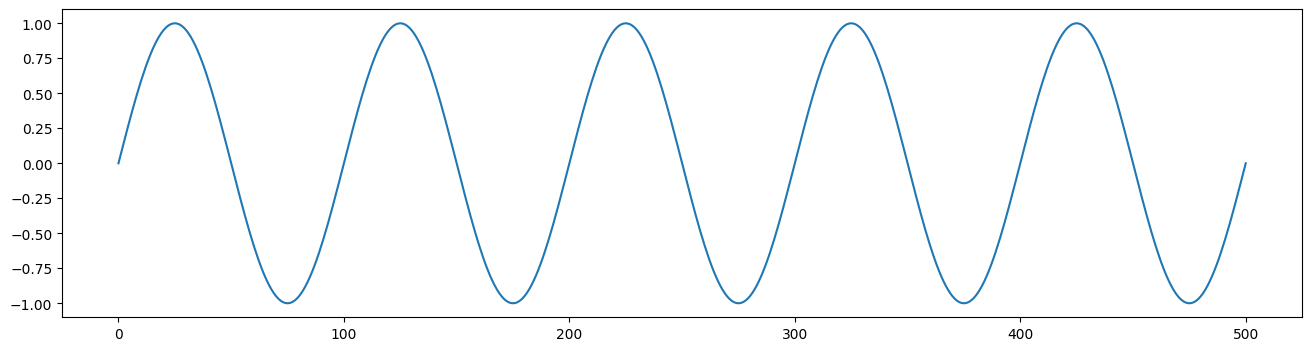

In [4]:
# sin波のグラフ表示
plt.figure(figsize=(16, 4))
plt.plot(t, dataset)

In [5]:
# ノイズを加える
dataset = sin(t) + np.random.normal(loc=0.0, scale=0.1, size=len(t))

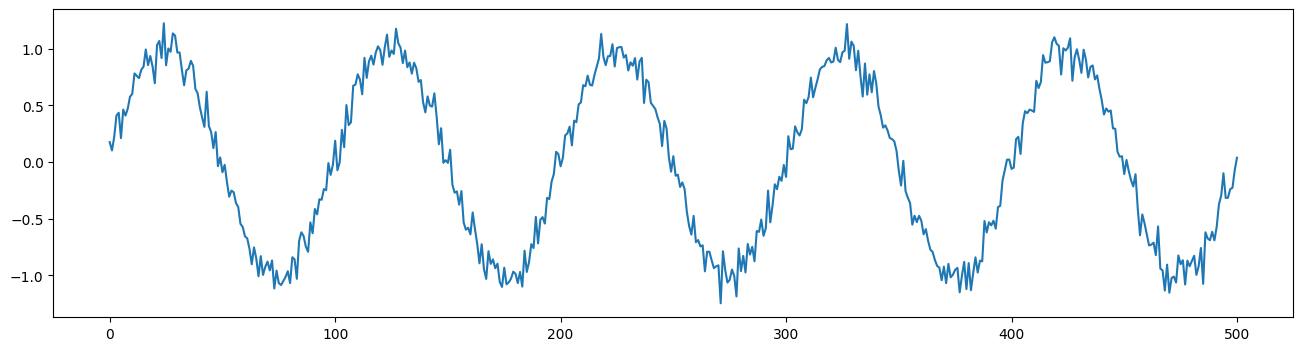

In [6]:
# ノイズを加えたsin波のグラフ表示
plt.figure(figsize=(16, 4))
plt.plot(t, dataset)

### 目的変数と説明変数の作成

In [7]:
# 入力データ長（順伝播の長さ）
T = 20

In [8]:
# 説明変数：目的変数の過去の情報
X = []
# 目的変数
Y = []

# 説明変数と目的変数の作成
for i in range(0, len(dataset) - T):
    X.append(dataset[i:i+T])
    Y.append(dataset[i+T])

In [9]:
# XとYが正しく取得されていることを確認
dataset[0:T+1]

array([0.17640523, 0.10280624, 0.22320703, 0.41147063, 0.43544569,
       0.21128921, 0.46313339, 0.41064357, 0.47143179, 0.57688665,
       0.60218961, 0.78285134, 0.76065088, 0.74113613, 0.81489957,
       0.84238443, 0.99373583, 0.85579085, 0.93613382, 0.84436691,
       0.69575753])

In [10]:
X[0]

array([0.17640523, 0.10280624, 0.22320703, 0.41147063, 0.43544569,
       0.21128921, 0.46313339, 0.41064357, 0.47143179, 0.57688665,
       0.60218961, 0.78285134, 0.76065088, 0.74113613, 0.81489957,
       0.84238443, 0.99373583, 0.85579085, 0.93613382, 0.84436691])

In [11]:
Y[0]

np.float64(0.6957575347117457)

In [12]:
# 学習用にreshape
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)

In [13]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (481, 1) , X= (481, 20, 1)


### データの分割

In [14]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, shuffle=False)

In [15]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (235, 1) , X_train= (235, 20, 1)
Y_valid= (101, 1) , X_valid= (101, 20, 1)
Y_test= (145, 1) , X_test= (145, 20, 1)


### モデルの構築

In [16]:
# 出力数（回帰のため1）
OUT_SIZE = 1
# 隠れ層のユニット数
HIDE_SIZE = 100
# RNNの入力形状: 任意のタイムステップ長, 1つの特徴量
rnn_input_shape = (None, 1)

In [17]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=rnn_input_shape),
    # RNN層
    tf.keras.layers.SimpleRNN(HIDE_SIZE),
    # 出力層
    tf.keras.layers.Dense(OUT_SIZE, activation='linear')
])

# モデルの構築
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='mean_squared_error')

In [18]:
# 学習の実施
log = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.4449 - val_loss: 0.0713
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0486 - val_loss: 0.0414
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0346 - val_loss: 0.0242
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0242 - val_loss: 0.0167
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171 - val_loss: 0.0152
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0142 - val_loss: 0.0144
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0165 - val_loss: 0.0145
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - val_loss: 0.0137
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0142 - val_loss: 0.0139
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132 - val_loss: 0.0135
E

In [19]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,905 (120.73 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,604 (80.49 KB)

### 学習の経過の確認

Text(0, 0.5, 'crossentropy')

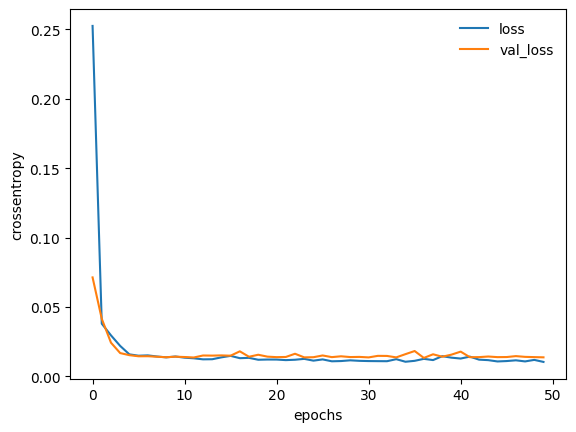

In [20]:
# 学習の経過をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### テストデータによる評価

In [21]:
# 予測
pred_ys = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


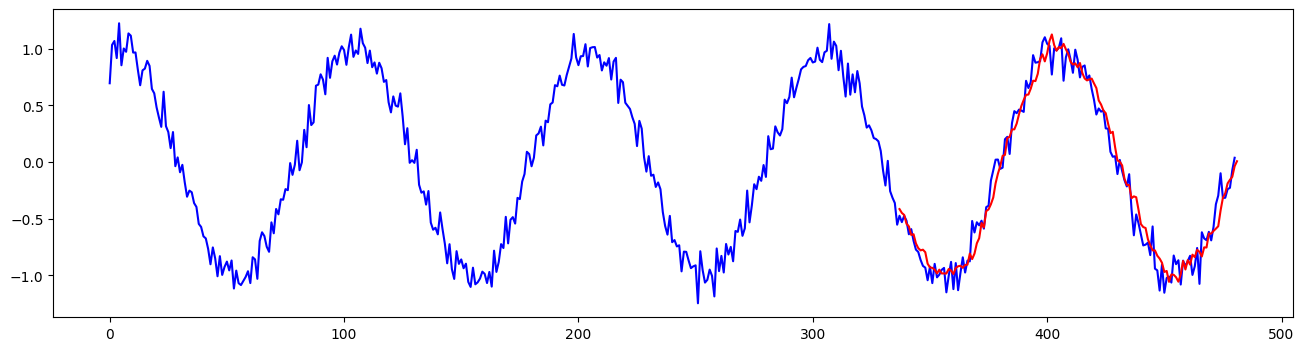

In [22]:
# 正解（青）と予測値（赤）との比較
plt.figure(figsize=(16, 4))
plt.plot(range(0, len(X)), Y, color='blue')
plt.plot(range(len(X_train)+len(X_valid)+1, len(X)+1), pred_ys, color='red')

In [23]:
# MSEを算出
0.5 * ((Y_test - pred_ys) ** 2).sum()

np.float64(0.9080464301661926)

## LSTMの実装

### モデルの構築

In [24]:
# モデルの初期化
model_lstm = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=rnn_input_shape),
    # RNN層
    tf.keras.layers.LSTM(HIDE_SIZE),
    # 出力層
    tf.keras.layers.Dense(OUT_SIZE, activation='linear')
])

# モデルの構築
model_lstm.compile(optimizer = tf.keras.optimizers.Adam(),
                   loss='mean_squared_error')

In [25]:
# 学習の実施
log_lstm = model_lstm.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=True,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                      min_delta=0, patience=100,
                                                                      verbose=1)],
                          validation_data=(X_valid, Y_valid))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.6015 - val_loss: 0.2518
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1952 - val_loss: 0.1331
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1046 - val_loss: 0.0731
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0701 - val_loss: 0.0392
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0336 - val_loss: 0.0157
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - val_loss: 0.0132
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - val_loss: 0.0117
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - val_loss: 0.0115
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - val_loss: 0.0122
E

In [26]:
# モデルの構造を表示
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,705 (479.32 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,804 (319.55 KB)

### 学習の経過の確認

Text(0, 0.5, 'crossentropy')

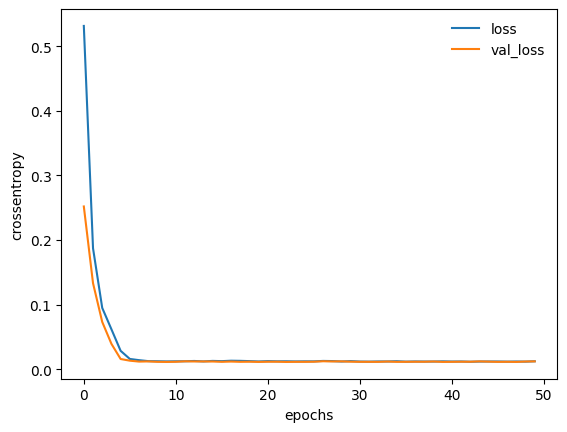

In [27]:
# 学習の経過をグラフ表示
plt.plot(log_lstm.history['loss'], label='loss')
plt.plot(log_lstm.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### テストデータによる評価

In [28]:
# 予測
pred_ys_lstm = model_lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


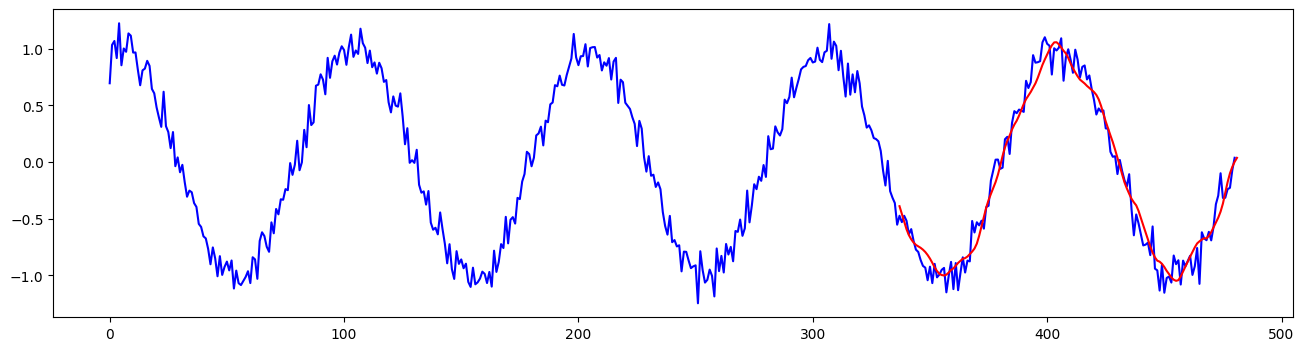

In [29]:
# 正解（青）と予測値（赤）との比較
plt.figure(figsize=(16, 4))
plt.plot(range(0, len(X)), Y, color='blue')
plt.plot(range(len(X_train)+len(X_valid)+1, len(X)+1), pred_ys_lstm, color='red')